In [64]:
import tensorflow 
import keras  
import os
import glob 
import skimage
from skimage import io 

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import random 
import numpy as np
from tqdm import tqdm
from skimage import io, transform
import matplotlib.pyplot as plt  
from keras.layers import Dense 
import random
import tensorflow as tf
import warnings
# filter warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [65]:
dataset_path = 'E:/FCIH-level 4/Selected 1/project/image dataset/raw-img'
class_names = ['elephant', 'mammoth']
animal_path = os.path.join(dataset_path, class_names[0], '*')
animal_path = glob.glob(animal_path)
image = io.imread(animal_path[4])  
len_elephant=len(os.listdir('E:/FCIH-level 4/Selected 1/project/image dataset/raw-img/elephant'))
print(len_elephant)
len_mammoth = len(os.listdir('E:/FCIH-level 4/Selected 1/project/image dataset/raw-img/mammoth'))
print(len_mammoth)
print(len_elephant + len_mammoth)

1446
711
2157


Text(0.5, 0.98, 'Original & RGB image channels')

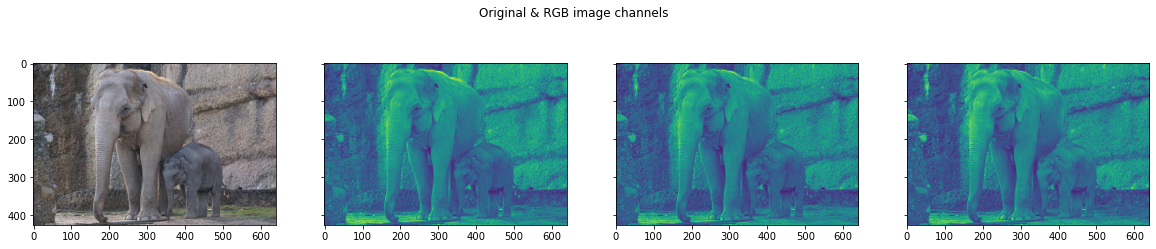

In [66]:
i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 

im1.imshow(image)  #Original image
im2.imshow(image[:, : , 0]) #Red
im3.imshow(image[:, : , 1]) #Green
im4.imshow(image[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

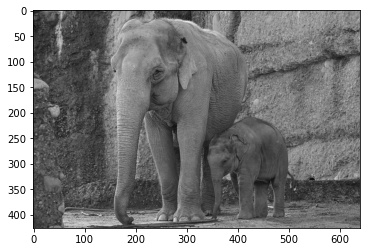

In [67]:
gray_image = skimage.color.rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')

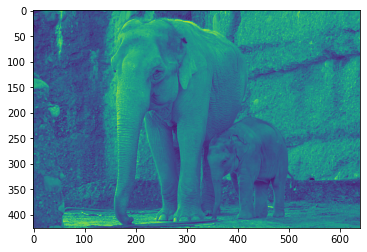

In [68]:
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

In [69]:
category_dir = "E:/FCIH-level 4/Selected 1/project/image dataset/raw-img"
img_size = 100

print(os.listdir(category_dir))

['elephant', 'mammoth']


In [70]:
# Read and load data 
def get_data(folder_path):
    imgs = []
    indices = []
    labels = []
    for idx, folder_name in enumerate(os.listdir(folder_path)):
        if folder_name in ( "elephant","mammoth") : 
            labels.append(folder_name)
            for file_name in tqdm(os.listdir(folder_path + '/' + folder_name)):
               if file_name.endswith('jpeg') or file_name.endswith('jpg') or file_name.endswith('png') or file_name.endswith('jfif'):
                    img_file = io.imread(folder_path + '/' +  folder_name + '/' + file_name)           
                    if img_file is not None:
                        image = color.rgb2gray(img_file)
                        norm_image = (image - np.min(image)) / (np.max(image) - np.min(image))
                        img_file =resize(norm_image, (img_size,img_size))
                        imgs.append(np.asarray(img_file))
                        indices.append(idx)
    imgs = np.asarray(imgs)
    indices = np.asarray(indices).reshape(-1,1)
    labels = np.asarray(labels)
    return imgs, indices, labels
    
X, y, labels = get_data(category_dir)    
print('X shape:', X.shape)
print('y shape:', y.shape)
print("labels:",labels)
random.shuffle(X)
random.shuffle(y)

100%|██████████| 711/711 [00:10<00:00, 66.94it/s]


X shape: (2157, 100, 100)
y shape: (2157, 1)
labels: ['elephant' 'mammoth']


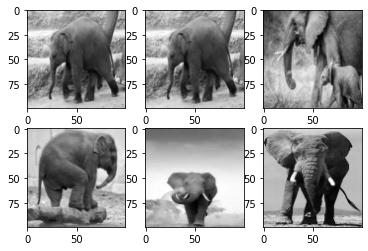

In [72]:
# show data 
plt.subplot(2, 3, 1)
plt.imshow(X[1],cmap = 'gray')
plt.axis('on')
plt.subplot(2, 3, 2)
plt.imshow(X[40],cmap = 'gray')
plt.axis('on')
plt.subplot(2, 3, 3)
plt.imshow(X[50],cmap = 'gray')
plt.axis('on')
plt.subplot(2, 3, 4)
plt.imshow(X[1000],cmap = 'gray')
plt.axis('on')
plt.subplot(2, 3, 5)
plt.imshow(X[1005],cmap = 'gray')
plt.axis('on')
plt.subplot(2, 3, 6)
plt.imshow(X[1040],cmap = 'gray')
plt.axis('on')
plt.show()

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
number_of_val = X_val.shape[0]


x_train = X_train.reshape(number_of_train,  X_train.shape[1]*X_train.shape[2])
x_test = X_test .reshape(number_of_test,  X_test.shape[1]*X_test.shape[2])
x_val = X_val.reshape(number_of_val,  X_val.shape[1]*X_val.shape[2])
 
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("x val: ",x_val.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)
print("y val: ",y_val.shape)

x train:  (1293, 10000)
x test:  (432, 10000)
x val:  (432, 10000)
y train:  (1293, 1)
y test:  (432, 1)
y val:  (432, 1)


In [74]:
len(X_train)

1293

In [75]:
len(X_test)

432

In [76]:
len(X_val)

432

In [77]:
import numpy as np
import tensorflow as tf
from keras.regularizers import l2

In [78]:
ann = tf.keras.models.Sequential()

In [79]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
opt = keras.optimizers.Adam(learning_rate=0.001)

In [80]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(Dense(32, kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))

In [81]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [82]:
ann.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [83]:
history=ann.fit(x_train, y_train, batch_size = 32, epochs = 100,validation_split=0.25)

Epoch 1/100
31/31 [==============================] - 0s 15ms/step - loss: 0.2930 - accuracy: 0.9195 - val_loss: 0.3034 - val_accuracy: 0.9259
Epoch 2/100
31/31 [==============================] - 0s 5ms/step - loss: 0.2460 - accuracy: 0.9422 - val_loss: 0.3011 - val_accuracy: 0.9259
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 0.2374 - accuracy: 0.9422 - val_loss: 0.3058 - val_accuracy: 0.9259
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 0.2418 - accuracy: 0.9422 - val_loss: 0.3550 - val_accuracy: 0.9259
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 0.2391 - accuracy: 0.9422 - val_loss: 0.2997 - val_accuracy: 0.9259
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 0.2299 - accuracy: 0.9422 - val_loss: 0.3032 - val_accuracy: 0.9259
Epoch 7/100
31/31 [==============================] - 0s 5ms/step - loss: 0.2219 - accuracy: 0.9422 - val_loss: 0.3337 - val_accuracy: 0.9259
Epoch 8/100


Epoch 59/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0789 - accuracy: 0.9680 - val_loss: 0.6912 - val_accuracy: 0.8951
Epoch 60/100
31/31 [==============================] - 0s 3ms/step - loss: 0.1070 - accuracy: 0.9577 - val_loss: 0.4506 - val_accuracy: 0.8457
Epoch 61/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0981 - accuracy: 0.9649 - val_loss: 0.9179 - val_accuracy: 0.9259
Epoch 62/100
31/31 [==============================] - 0s 3ms/step - loss: 0.1047 - accuracy: 0.9659 - val_loss: 0.4430 - val_accuracy: 0.8457
Epoch 63/100
31/31 [==============================] - 0s 4ms/step - loss: 0.1024 - accuracy: 0.9587 - val_loss: 0.5444 - val_accuracy: 0.8735
Epoch 64/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0838 - accuracy: 0.9649 - val_loss: 0.5988 - val_accuracy: 0.8796
Epoch 65/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0839 - accuracy: 0.9711 - val_loss: 0.6284 - val_accuracy: 0.8796
Epoch 

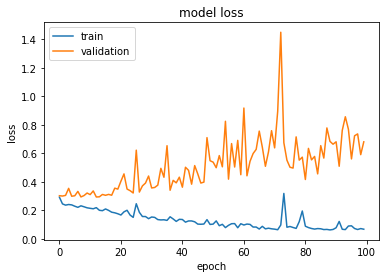

In [84]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [85]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[384  26]
 [ 21   1]]


0.8912037037037037

In [87]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [88]:
y_pred = ann.predict(x_test).ravel()
y_pred

array([2.04509497e-03, 4.30613756e-04, 6.34711981e-03, 1.51306391e-04,
       1.26811556e-05, 1.07610074e-04, 2.12579966e-04, 7.92857236e-07,
       2.11448460e-05, 1.30802393e-04, 6.70191228e-01, 1.47857249e-01,
       6.70191228e-01, 1.04621053e-03, 4.94699088e-06, 2.47758627e-03,
       3.36828232e-02, 6.93202019e-03, 9.03880596e-03, 2.13047862e-03,
       4.73501714e-05, 1.98990107e-04, 5.05506992e-03, 3.78121367e-05,
       3.63856554e-03, 2.01821327e-04, 5.44738472e-01, 5.49067045e-06,
       8.73863697e-04, 2.79664993e-04, 1.49279833e-03, 1.05351210e-03,
       6.70191228e-01, 3.50683928e-04, 1.11430883e-03, 2.52678990e-03,
       6.92975009e-05, 7.20726348e-07, 1.06400206e-04, 3.21998894e-02,
       1.01854705e-04, 2.79613733e-02, 1.30802393e-04, 9.32657144e-07,
       1.47908926e-04, 2.04509497e-03, 6.30994737e-02, 6.70191228e-01,
       1.39817595e-02, 1.25586987e-04, 2.45064497e-04, 3.36828232e-02,
       1.02177262e-03, 2.28571892e-03, 7.30891625e-05, 6.48122295e-05,
      

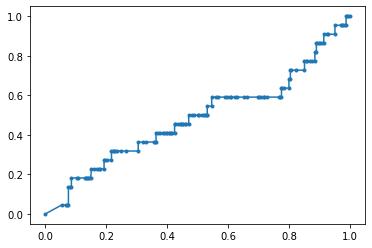

In [89]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test  , y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)